# Functions

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

def initializePlot(rangemin, rangemax):
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(1, 1, 1)

    # Major ticks every 20, minor ticks every 5
    ticks = np.arange(rangemin, rangemax, 1)

    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    # And a corresponding grid
    ax.grid(which='both')
    
def makePlot(lines, rangemin, rangemax):
    # Make plot
    for c in lines:
        plt.plot(c[0], c[1], label=c[2])
    plt.xlim(rangemin, rangemax)
    plt.ylim(rangemin, rangemax)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')

# Question 1

$P = \left\{ x \in \mathbb{R}^2 | \begin{bmatrix} 
1 & 0 \\
0 & 1 \\
-1 & -1 \\
-1 & 1
\end{bmatrix}
x \leq
\begin{bmatrix} 
3 \\
2 \\
-1 \\
1
\end{bmatrix}
\right\}$

Let us rewrite the matrix notation into a collection of linear inequalitities with
$x = \begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$.

We have that
\begin{align}
    x_1 \leq 3 \\
    x_2 \leq 2 \\
    -x_1 - x_2 \leq -1 \\
    -x_1 + x_2 \leq 1
\end{align}

## Feasible region

In [2]:
def feasibleRegion1():
    # plot the feasible region
    d = np.linspace(-16, 16, 2000)
    x1,x2 = np.meshgrid(d,d)
    plt.imshow( ((x1 <= 3) & 
                 (x2 <= 2) & 
                 (-x1 - x2 <= -1) & 
                 (-x1 + x2 <= 1))
               .astype(int) , extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.25);

def constrains1():
    # plot the lines defining the constraints
    x1 = np.linspace(-16, 16, 2000)
    x2 = np.linspace(-16, 16, 2000)
    # x1 <= 3
    x1_1 = 3
    # x2 <= 2
    x2_2 = 2
    # -x1 - x2 <= -1 iff -x1 + 1 <= x2
    x2_3 = 1 - x1
    # -x1 + x2 <= 1 iff x2 <= 1 + x1
    x2_4 = 1 + x1
    
    result = [(x1_1*np.ones_like(x1), x2, r'$x_1 \leq 3$'),
                   (x1, x2_2*np.ones_like(x1), r'$x_2 \leq 2$'),
                   (x1, x2_3, r'$-x_1 - x_2 \leq -1$'),
                   (x1, x2_4, r'$-x_1 + x_2 \leq 1$')
                  ]
    return result

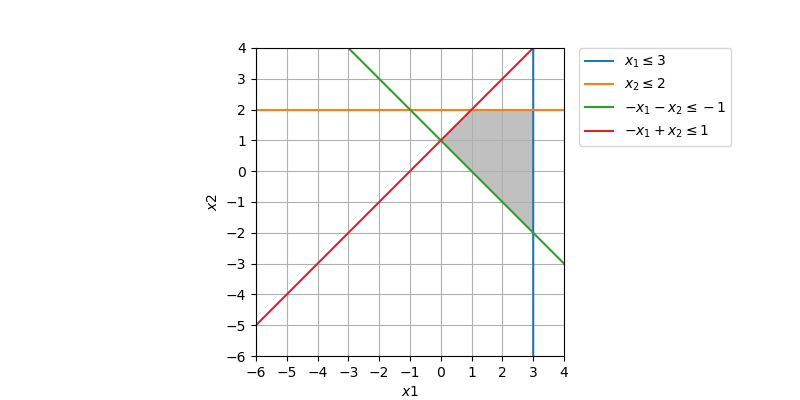

In [3]:
initializePlot(-16, 16)
feasibleRegion1()
contraints = constrains1()
makePlot(contraints, -6, 4)

## Hyperplanes

In [4]:
def hyperplanes1():
    # create the hyperplanes
    x1 = np.linspace(-16, 16, 2000)
    # 2*x1 + x2 = 1
    x2_1 = 1 - 2*x1
    # x1 + x2 = 1
    x2_2 = 1 - x1
    
    result = [(x1, x2_1, r'$H_1 = 2\cdot x_1 + x_2 = 1$'),
              (x1, x2_2, r'$H_2 = x_1 + x_2 = 1$')
                  ]
    return result

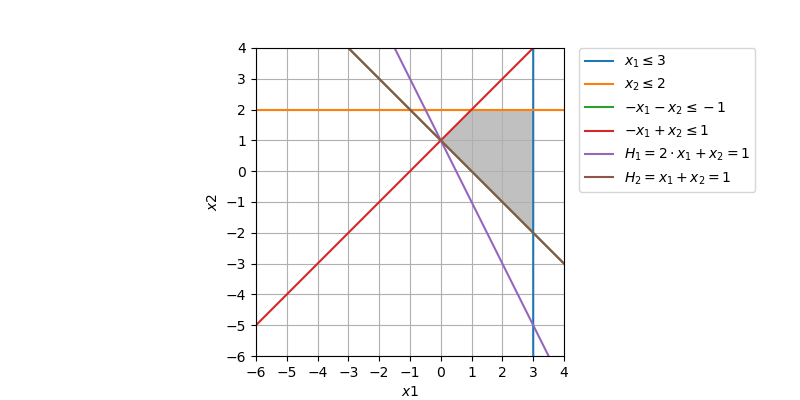

In [5]:
initializePlot(-16, 16)
feasibleRegion1()
contraints = constrains1()
hyperplanes = hyperplanes1()
makePlot(contraints + hyperplanes, -6, 4)

# Question 2

## (a)

In [6]:
def feasibleRegion2():
    # plot the feasible region
    d = np.linspace(-16, 16, 2000)
    x1,x2 = np.meshgrid(d,d)
    plt.imshow( ((-x1 + 2*x2  <= 1) & 
                 (-2*x1 - 3*x2 <= -9) & 
                 (-x2 <= -1))
               .astype(int) , extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.25);

def constrains2():
    # plot the lines defining the constraints
    x1 = np.linspace(-16, 16, 2000)
    # -x1 + 2*x2  <= 1
    x2_1 = (1 + x1)/2
    # -2*x1 - 3*x2 <= -9
    x2_2 = (-9 + 2*x1)/(-3)
    # -x2 <= -1
    x2_3 = 1
    
    result = [(x1, x2_1, r'$-x_1 + 2\cdot x_2  \leq 1$'),
              (x1, x2_2, r'$-2\cdot x_1 - 3\cdot x_2 \leq -9$'),
              (x1, x2_3*np.ones_like(x1), r'$-x_2 \leq -1$'),
                  ]
    return result

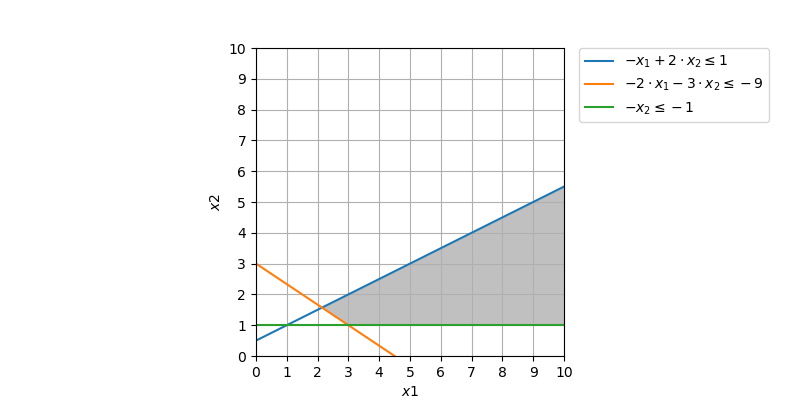

In [7]:
initializePlot(-16, 16)
feasibleRegion2()
contraints = constrains2()
makePlot(contraints, 0, 10)

## (b)

### Plot of $x_1 + x_2 + x_3 = 1 \iff x_3 = 1 - x_1 - x_2$ and $ -x_1 + 2\cdot x_2 - x_3 = 2 \iff -x_1 + 2\cdot x_2 - 2 = x_3$

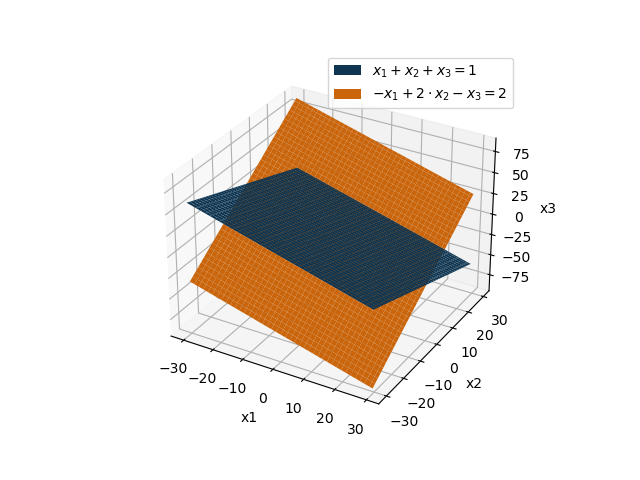

In [8]:
def c1_x3(x1, x2):
    # x_3 = 1 - x_1 - x_2
    return 1.0 - x1 - x2

def c2_x3(x1, x2):
    # -x_1 + 2\cdot x_2 - 2 = x_3
    return - x1 + 2*x2 - 2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def createSurface(minrange, maxrange, step, fun, label):
    x = y = np.arange(minrange, maxrange, step)
    X, Y = np.meshgrid(x, y)
    zs = np.array(fun(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)
    
    
    surf = ax.plot_surface(X, Y, Z, label=label)
    surf._edgecolors2d = surf._edgecolor3d
    surf._facecolors2d = surf._facecolor3d
    return surf

surf1 = createSurface(-30.0, 30.0, 0.5, c1_x3, r'$x_1 + x_2 + x_3 = 1$')
surf2 = createSurface(-30.0, 30.0, 0.5, c2_x3, r'$-x_1 + 2\cdot x_2 - x_3 = 2$')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.legend(bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.)

plt.show()


### Plot of intersection of $x_1 + x_2 + x_3 = 1$ and $ -x_1 + 2\cdot x_2 - x_3 = 2$

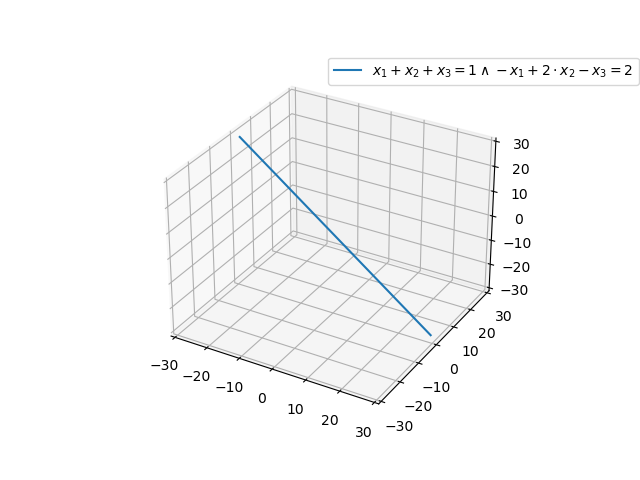

In [9]:
V = []
x_data = []
y_data = []
z_data = []
for z in np.arange(-30, 30, 1):
    for x in np.arange(-30, 30, 1):
        for y in np.arange(-30, 30, 1):
            if x+y+z == 1  and -x + 2*y -z == 2:
                x_data.append(x)
                y_data.append(y)
                z_data.append(z)
                V.append([x,y,z])

# fig.show()
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
ax.set_zlim([-30,30])

ax.plot(x_data,y_data,z_data, label=r'$x_1 + x_2 + x_3 = 1 \wedge -x_1 + 2\cdot x_2 - x_3 = 2$')
ax.legend(bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.)
plt.show()